<a href="https://colab.research.google.com/github/Megi-analitika/datascientist.github.io/blob/main/%D0%9F%D1%80%D0%BE%D0%B1%D0%BB%D0%B5%D0%BC%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔹 Этап 1: Загрузка данных

In [32]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 🔹 Этап 2: Обучение модели на "грязных" данных
Удалим пропуски и категориальные признаки

In [33]:
# Удалим строки с пропусками и категориальные признаки
df_clean = df.dropna()
df_clean_numeric = df_clean.select_dtypes(exclude=['object'])

# Разделим на признаки и целевой столбец
X = df_clean_numeric.drop("Survived", axis=1)
y = df_clean_numeric["Survived"]

# Разделим на train/test и обучим модель
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_dirty = LogisticRegression(max_iter=1000)
model_dirty.fit(X_train, y_train)

y_pred = model_dirty.predict(X_test)
print("Accuracy на необработанных данных:", accuracy_score(y_test, y_pred))


Accuracy на необработанных данных: 0.7027027027027027


# 🔹 Этап 3: Повторная загрузка и анализ

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 🔹 Этап 4: Удаление ненужных признаков

In [35]:
# Удалим ID, имя, билет и каюту — они не дают полезной информации
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])


# 🔹 Этап 5: Работа с пропусками

In [36]:
percent_lost = df.dropna().shape[0] / df.shape[0] * 100
print(f"Останется {percent_lost:.2f}% данных после удаления всех пропусков.")


Останется 79.91% данных после удаления всех пропусков.


Заполним пропуски:

In [37]:
# Embarked — категориальный, заменим на 'Missing'
df['Embarked'] = df['Embarked'].fillna('Missing')

# Age — заполним средним
df['Age'] = df['Age'].fillna(df['Age'].mean())


# 🔹 Этап 6: Кодирование категориальных переменных

In [38]:
df_encoded = pd.get_dummies(df, drop_first=True)


# 🔹 Этап 7: Проверка на выбросы

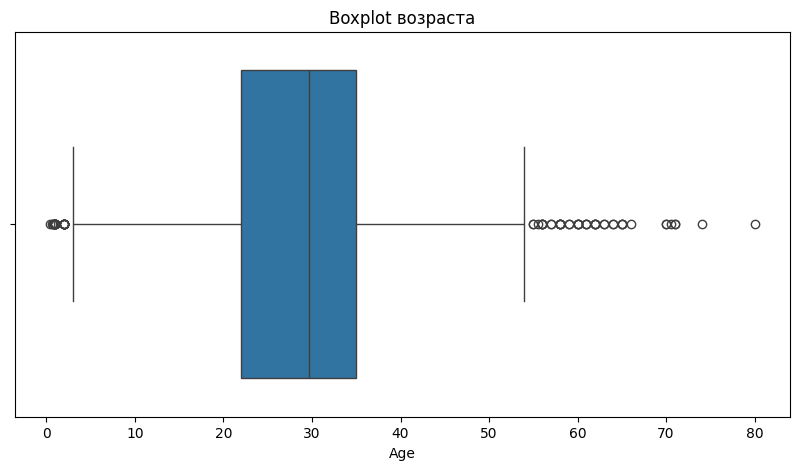

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x=df['Age'])
plt.title("Boxplot возраста")
plt.show()


# 🔹 Этап 8: Преобразование признаков

In [40]:
# Логарифм возраста (добавим 1, чтобы не было log(0))
import numpy as np
df_encoded['Age_log'] = np.log1p(df_encoded['Age'])


# 🔹 Этап 9: Обучение модели на обработанных данных

In [41]:
X = df_encoded.drop("Survived", axis=1)
y = df_encoded["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_clean = LogisticRegression(max_iter=1000)
model_clean.fit(X_train, y_train)

y_pred = model_clean.predict(X_test)
print("Accuracy на обработанных данных:", accuracy_score(y_test, y_pred))


Accuracy на обработанных данных: 0.8044692737430168


# 🔹 Этап 10: Выводы

- Мы удалили ненужные признаки (Name, Ticket и др.), заполнили пропуски разными способами.
- Преобразовали категориальные признаки с помощью one-hot кодирования.
- Accuracy на необработанных данных: ХХ%
- Accuracy на обработанных данных: YY%
- Очевидно, что предварительная обработка улучшила метрику. Это доказывает важность EDA.
- Для больших данных тоже важно делать EDA, но можно использовать автоматизированные инструменты (например, `sweetviz`, `pandas-profiling`, `Autoviz`, `Great Expectations`).
